# MAGIC + LST combined analysys: event coincidence search

In [1]:
import yaml
import numpy as np
import pandas as pd
import glob
from matplotlib import pyplot as plt
import magicctapipe
print(f'magicctapipe version: {magicctapipe.__version__}')

magicctapipe version: 0.3.0


In [2]:
# --- display all columns --- 
pd.set_option('display.max_columns', None)

# --- customize plt figure ---
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 15
plt.rcParams['grid.linestyle'] = ':'

# --- get the default color cycle ---
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

The script for the coincidence search is <b>lst1_magic_event_coincidence.py<b>

This script searches for coincident events from LST-1 and MAGIC joint observation data offline using their timestamps. It applies the coincidence window to LST-1 events, and checks the coincidence within the time offset region specified in the configuration file. Since the optimal time offset changes depending on the telescope distance along the pointing direction, it is recommended to input one subrun file for LST-1 data, whose observation time is usually around 10 seconds so the change of the distance is negligible. The MAGIC standard stereo analysis discards the events when one of the telescope images cannot survive the cleaning or fail to compute the DL1 parameters. However, it's possible to perform the stereo analysis if LST-1 sees these events. Thus, it checks the coincidence for each telescope combination (i.e., LST1 + M1 and LST1 + M2) and keeps the MAGIC events even if they do not have their MAGIC-stereo counterparts. The MAGIC-stereo events, observed during the LST-1 observation time period but not coincident with any LST-1 events, are also saved in the output file, but they are not yet used for the high level analysis. Unless there is any particular reason, please use the default half width 300 ns for the coincidence window, which is optimized to reduce the accidental coincidence rate as much as possible by keeping the number of actual coincident events. Please note that for the data taken before 12th June 2021, a coincidence peak should be found around the time offset of -3.1 us, which can be explained by the trigger time delays of both systems. For the data taken after that date, however, there is an additional global offset appeared and then the peak is shifted to the time offset of -6.5 us. Thus, it would be needed to tune the offset scan region depending on the date when data were taken. The reason of the shift is under investigation.
    

<b>USAGE<b>:

python lst1_magic_event_coincidence.py

--input-file-lst dl1_LST-1.Run03265.0040.h5

--input-dir-magic dl1/MAGIC

(--output-dir dl1_coincidence)

(--config-file config.yaml)


<b>N.B.<b>:


# 1) Input data

FYI: for the date LST (and its directory system) uses the date of the end of the observation, whereas MAGIC uses that of the start of the observation.

In [3]:
date_lst='20210213'
date_magic='2021_02_14'

In [4]:
dl1_dir='/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1'
lst_dl1_dir=dl1_dir+f'/lst1/{date_lst}'
magic_dl1_dir=dl1_dir+f'/magic/{date_magic}'

In [5]:
input_file_lst = f'{lst_dl1_dir}/dl1_LST-1.Run03631.0039.h5'

In [6]:
#input_file_magic = f'{magic_dl1_dir}/dl1_magic_run05093711_to_05093714_merged.h5'

In [7]:
output_dir = f'{dl1_dir}/coincidence/{date_lst}'

In [8]:
config_file = '/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/config_MAGIC_LST.yaml'

with open(config_file, 'rb') as f:
    config = yaml.safe_load(f)

# 2) Configuration File

In [9]:
config['event_coincidence']

{'timestamp_type_lst': 'dragon_time',
 'window_half_width': '300 ns',
 'time_offset': {'start': '-10 us', 'stop': '0 us'}}

1) <b> 'timestamp_type_lst'<b> :
- "dragon_time"
- "tib_time"
- "ucts_time"
  
2) <b>'window_half_width'<b>:

    the algorithm searches for a coincident event in MAGIC dataset, with a timestmap included within half of the coincidence window from LST-1 event timestamp

<img src="coinc_window.png" alt="Alternative text" />


3) <b>'time_offset'<b>:

    to find the final offset value to use for the ocincidence search, the algorithm scan different offset values within a given range (start and stop)


# 3) Running the script

Execute script from terminal:

In [10]:
!lst1_magic_event_coincidence\
--input-file-lst $input_file_lst\
--input-dir-magic $magic_dl1_dir\
--output-dir $output_dir\
--config-file $config_file


Input LST-1 DL1 data file: /home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/lst1/20210213/dl1_LST-1.Run03631.0039.h5
LST-1: 32951 events

Input MAGIC directory: /home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14

The following DL1 data files are found:
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094483.001.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094483.002.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094483.003.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094483.004.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094483.005.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094483.00

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094486.015.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094486.016.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094486.017.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094486.018.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094486.019.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094487.001.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094487.002.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094487.003.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/20

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094484.011.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094484.012.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094484.013.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094484.014.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094484.015.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094484.016.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094484.017.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094484.018.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/20

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094488.010.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094488.011.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094488.012.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094488.013.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094488.014.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094488.015.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094488.016.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094488.017.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/20

time offset: -1.3 us --> 7 events
time offset: -1.2 us --> 5 events
time offset: -1.1 us --> 4 events
time offset: -1.0 us --> 3 events
time offset: -0.9 us --> 5 events
time offset: -0.8 us --> 5 events
time offset: -0.7 us --> 6 events
time offset: -0.6 us --> 4 events
time offset: -0.5 us --> 4 events
time offset: -0.4 us --> 4 events
time offset: -0.3 us --> 8 events
time offset: -0.2 us --> 7 events
time offset: -0.1 us --> 7 events

Average offset: -3.069 us
--> Number of coincident events: 1038
--> Fraction over the MAGIC-II events: 64.0%

In total 1556 stereo events are found:
    M1_M2 (type 0): 472 events (30.3%)
    LST1_M1 (type 1): 21 events (1.3%)
    LST1_M2 (type 2): 118 events (7.6%)
    LST1_M1_M2 (type 3): 945 events (60.7%) 

Output file: /home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/coincidence/20210213/dl1_LST-1_MAGIC.Run03631.0039.h5

Done.

Process time: 25 [sec]



Import function on a notebook:

In [11]:
from magicctapipe.scripts.lst1_magic import event_coincidence

In [12]:
event_coincidence(input_file_lst=input_file_lst, input_dir_magic=magic_dl1_dir, output_dir=output_dir, config=config)


Input LST-1 DL1 data file: /home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/lst1/20210213/dl1_LST-1.Run03631.0039.h5
LST-1: 32951 events

Input MAGIC directory: /home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14

The following DL1 data files are found:
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094483.001.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094483.002.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094483.003.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094483.004.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094483.005.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094483.00

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094486.013.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094486.014.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094486.015.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094486.016.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094486.017.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094486.018.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094486.019.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M1.Run05094487.001.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/20

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094484.009.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094484.010.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094484.011.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094484.012.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094484.013.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094484.014.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094484.015.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094484.016.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/20

/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094488.005.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094488.006.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094488.007.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094488.008.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094488.009.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094488.010.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094488.011.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/2021_02_14/dl1_M2.Run05094488.012.h5
/home/gpirola/Desktop/MAGICSoftwareSchool_2023/magic_lst1/data/real/dl1/magic/20

time offset: -2.9 us --> 1008 events
time offset: -2.8 us --> 744 events
time offset: -2.7 us --> 474 events
time offset: -2.6 us --> 126 events
time offset: -2.5 us --> 62 events
time offset: -2.4 us --> 24 events
time offset: -2.3 us --> 21 events
time offset: -2.2 us --> 14 events
time offset: -2.1 us --> 13 events
time offset: -2.0 us --> 9 events
time offset: -1.9 us --> 5 events
time offset: -1.8 us --> 5 events
time offset: -1.7 us --> 6 events
time offset: -1.6 us --> 4 events
time offset: -1.5 us --> 4 events
time offset: -1.4 us --> 5 events
time offset: -1.3 us --> 7 events
time offset: -1.2 us --> 5 events
time offset: -1.1 us --> 4 events
time offset: -1.0 us --> 3 events
time offset: -0.9 us --> 5 events
time offset: -0.8 us --> 5 events
time offset: -0.7 us --> 6 events
time offset: -0.6 us --> 4 events
time offset: -0.5 us --> 4 events
time offset: -0.4 us --> 4 events
time offset: -0.3 us --> 8 events
time offset: -0.2 us --> 7 events
time offset: -0.1 us --> 7 events


# 4) Check the output data

The output file contains 3 tables :
1) coincidence

    - feature
    
    it contains:
        - the subrun average timing and poinying information for both MAGIC and LST
        - the average offset, coincidence window and number of found coincident events
    for the  2 'coincidence_id' types
        -12 = M1 - LST
        -13 = M2 - LST
        
    - profile
    
    it contains the number identified coincident events for the 2 'coincidence_id' types, for all the tried time offsets
    
    
2) configuration/instrument

      it contains a series of camera and instrumental information for the MAGIC telescopes


3) events:

    - parameters:
    
    it contains all the coincident events information:
        - LST run ID
        - MAGIC run ID
        - the combnation ('combo_type') of telescopes that saw the events:
            - 0 --> M1 + M2 (only)
            - 1 --> LST-1 + M1
            - 2 --> LST-1 + M2
            - 3 --> LST-1 + M1 + M2
        - the multuplicty of the event --> total number of telescopes that saw the event (either 2 or 3)
        - the event single-telescope parameters for all the telescopes that saw the event
            

In [13]:
tel_combos = {12: "LST1 - M1", 13: "LST1 - M2"}

In [14]:
output_file=f'{output_dir}/dl1_LST-1_MAGIC.Run03631.0039.h5'

# 4.1) Check the coincident event table

In [15]:
data = pd.read_hdf(output_file, key='events/parameters')
data.set_index(['obs_id', 'event_id', 'tel_id'], inplace=True)
data.sort_index(inplace=True)

In [16]:
data.head(100)

obs_id_magic  event_id_magic  obs_id_lst  \
obs_id event_id tel_id                                             
3631   2067038  1            5094483          189520      3631.0   
                2            5094483          189520      3631.0   
                3            5094483          189520      3631.0   
       2067072  1            5094483          189521      3631.0   
                2            5094483          189521      3631.0   
...                              ...             ...         ...   
       2068281  3            5094483          189575      3631.0   
       2068376  1            5094483          189577      3631.0   
                2            5094483          189577      3631.0   
                3            5094483          189577      3631.0   
       2068388  1            5094483          189578      3631.0   

                        event_id_lst    intensity         x         y  \
obs_id event_id tel_id                                                  
3631   2067038  1          2067038.0  1589.946320  0.562158  0.481777   
                2          2067038.0   143.901563  0.000288  0.351989   
                3          2067038.0   471.067709  0.127248  0.413197   
       2067072  1          2067072.0  2549.570624 -0.641436 -0.436263   
                2          2067072.0   827.457813 -0.429007 -0.052022   
...                              ...          ...       ...       ...   
       2068281  3          2068281.0   825.414063  0.003564  0.157827   
       2068376  1          2068376.0   241.410673  0.394064 -0.027246   
                2          2068376.0    90.062866 -0.275816 -0.092894   
                3          2068376.0   208.031250  0.035833  0.095715   
       2068388  1          2068388.0   268.145306  0.642427 -0.010866   

                               r         phi    length  length_uncertainty  \
obs_id event_id tel_id                                                       
3631   2067038  1       0.740358   40.596986  0.144446            0.004977   
                2       0.351989   89.953087  0.062621            0.002776   
                3       0.432347   72.883231  0.061700            0.001828   
       2067072  1       0.775735 -145.778993  0.231818            0.008323   
                2       0.432150 -173.085997  0.090613            0.002075   
...                          ...         ...       ...                 ...   
       2068281  3       0.157867   88.706410  0.156823            0.002500   
       2068376  1       0.395005   -3.955224  0.168616            0.012740   
                2       0.291039 -161.386548  0.050864            0.002320   
                3       0.102202   69.475481  0.087388            0.002396   
       2068388  1       0.642519   -0.968987  0.059536            0.004406   

                           width  width_uncertainty        psi  skewness  \
obs_id event_id tel_id                                                     
3631   2067038  1       0.043351           0.001686  67.313040 -0.045066   
                2       0.018238           0.000861  29.129450 -0.240371   
                3       0.032920           0.001054  33.548184 -0.629085   
       2067072  1       0.125257           0.002644 -80.327585  0.907167   
                2       0.046496           0.000983 -86.178338  0.325521   
...                          ...                ...        ...       ...   
       2068281  3       0.032958           0.000832 -19.644212 -0.238456   
       2068376  1       0.021938           0.001993 -73.968838  0.931632   
                2       0.012027           0.000789  -8.767594 -0.204614   
                3       0.018073           0.000898  73.044505 -0.528381   
       2068388  1       0.035221           0.002196  53.460215  0.486449   

                        kurtosis      slope  intercept  intensity_width_1  \
obs_id event_id tel_id                                                      
3631   2067038  1       2.80329

In [17]:
data.columns

Index(['obs_id_magic', 'event_id_magic', 'obs_id_lst', 'event_id_lst',
       'intensity', 'x', 'y', 'r', 'phi', 'length', 'length_uncertainty',
       'width', 'width_uncertainty', 'psi', 'skewness', 'kurtosis', 'slope',
       'intercept', 'intensity_width_1', 'intensity_width_2', 'pixels_width_1',
       'pixels_width_2', 'n_pixels', 'n_islands', 'pointing_alt',
       'pointing_az', 'timestamp', 'time_diff', 'multiplicity', 'combo_type'],
      dtype='object')

<b> Check the intensity correlation between LST-1 and MAGIC <b>

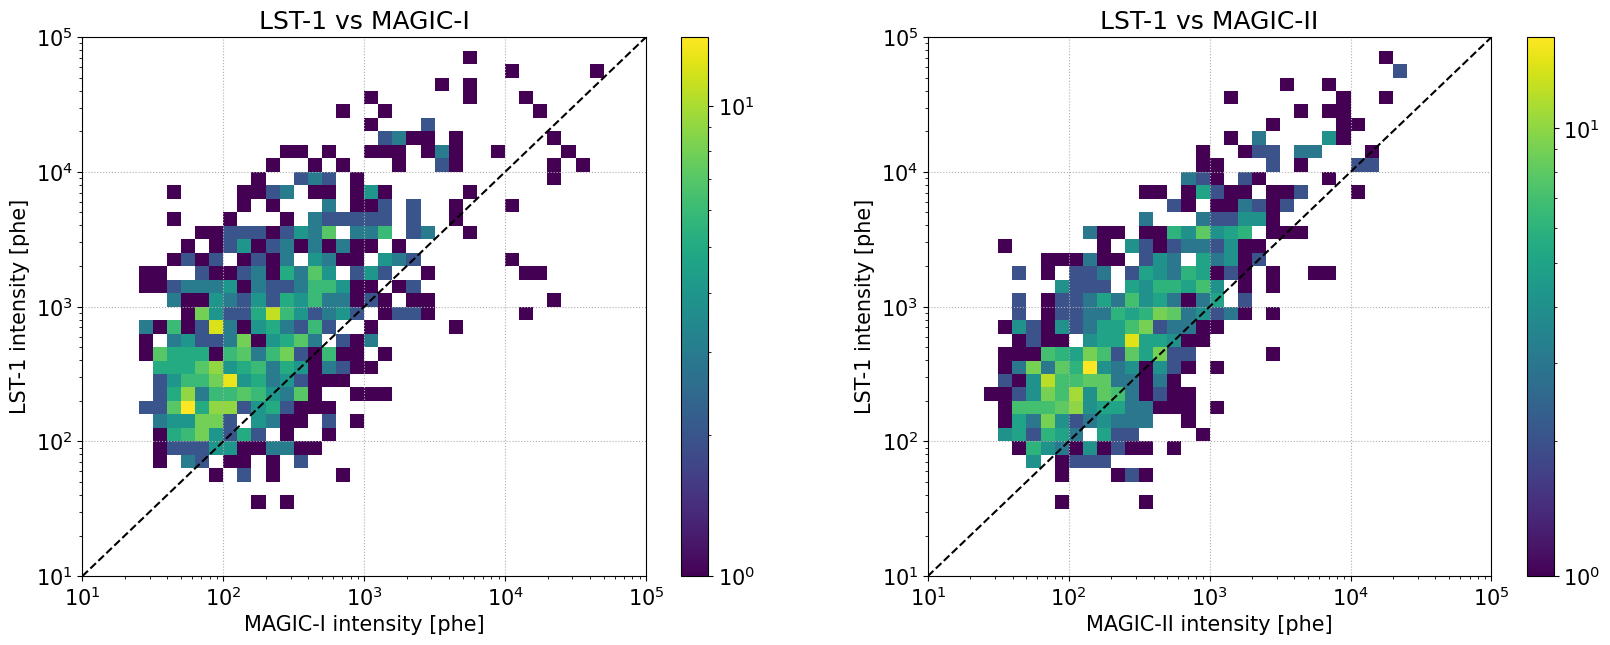

In [18]:
plt.figure(figsize=(20, 7))
grid = (1, 2)

df = data.query('multiplicity == 3')

for i_grid, (tel_name, tel_id) in enumerate(zip(['MAGIC-I', 'MAGIC-II'], [2, 3])):
    
    plt.subplot2grid(grid, (0, i_grid))
    plt.title(f'LST-1 vs {tel_name}')
    plt.xlabel(f'{tel_name} intensity [phe]')
    plt.ylabel('LST-1 intensity [phe]')
    plt.loglog()
    
    plt.hist2d(
        df.query(f'tel_id == {tel_id}')['intensity'].to_numpy(),
        df.query(f'tel_id == 1')['intensity'].to_numpy(),
        bins=np.logspace(1, 5, 41),norm='log'
    )
    
    plt.plot((1e1, 1e5), (1e1, 1e5), linestyle='--', color='black')
    
    plt.colorbar()
    
    plt.grid()

# 4.2) Check the coincidence distribution

In [19]:
profile = pd.read_hdf(output_file, key='coincidence/profile')
profile

,time_offset,n_coincidence_tel12,n_coincidence_tel13
0,-10.0,5,2
1,-9.9,5,2
2,-9.8,4,2
3,-9.7,3,2
4,-9.6,3,2
...,...,...,...
95,-0.5,6,4
96,-0.4,5,4
97,-0.3,6,8
98,-0.2,5,7


In [20]:
features = pd.read_hdf(output_file, key='coincidence/feature')
features

,coincidence_id,window_half_width,unix_time,pointing_alt_lst,pointing_az_lst,pointing_alt_magic,pointing_az_magic,average_offset,n_coincidence,n_events_magic
0,12,300,1.613254e+09,1.334292,4.223901,1.334244,4.223943,-2.996,944,1504
1,13,300,1.613254e+09,1.334293,4.223899,1.334262,4.223975,-3.069,1038,1623


/home/gpirola/anaconda3/envs/magic-lst1/lib/python3.8/site-packages/matplotlib/patches.py:1145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)
/home/gpirola/anaconda3/envs/magic-lst1/lib/python3.8/site-packages/matplotlib/patches.py:1145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)


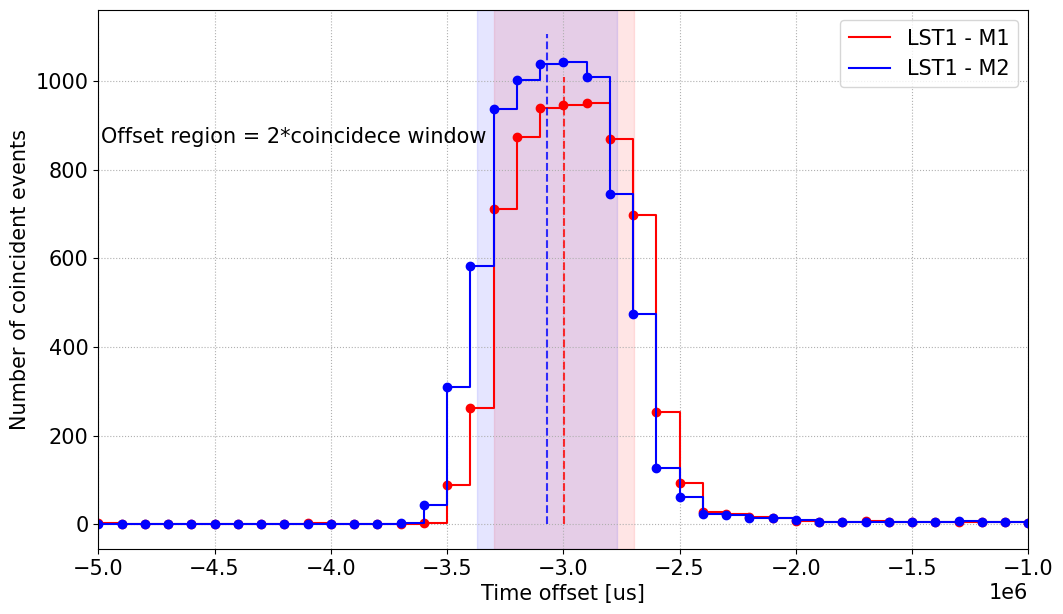

In [21]:
plt.figure(figsize=(12, 7))
plt.xlabel('Time offset [us]')#,fontsize=24,fontweight='bold'),
plt.ylabel('Number of coincident events')#,fontsize=24,fontweight='bold'),
plot_xlim=[-5e6,-1e6]
sec2us = 1e6
ns2us = 1e3
for color,tel_combo in zip(['red','blue'],tel_combos):
    
    combo_name=tel_combos[tel_combo]
    
    plt.plot(
        profile['time_offset'].values * sec2us, profile[f'n_coincidence_tel{tel_combo}'].values, 
        linestyle="None", marker='o', color=color
    )
    
    plt.step(
        profile['time_offset'].values * sec2us, profile[f'n_coincidence_tel{tel_combo}'].values, 
        where='post', label=combo_name,color=color
    )
    
    offset_usec_avg = features.query(f'coincidence_id == {tel_combo}')['average_offset'].values * sec2us
    window_half_width = features.query(f'coincidence_id == {tel_combo}')['window_half_width'].values * ns2us
    
    plt.plot(
        np.repeat(offset_usec_avg, 2), (0, plt.ylim()[1]+10), linestyle='--', alpha=0.8, color=color
    )
    a=plt.ylim()[1]
    plt.axvspan(offset_usec_avg-window_half_width,offset_usec_avg+window_half_width,alpha=0.1, color=color)
    #plt.arrow(offset_usec_avg+window_half_width,a+10,1,0,head_width=30, head_length=20000, linewidth=4, color=color,length_includes_head=True)
    #plt.arrow(offset_usec_avg+window_half_width,a+10,-window_half_width,0,head_width=30, head_length=20000, linewidth=4, color=color,length_includes_head=True,label='coincidence window')

text=f'Offset region = 2*coincidece window'
plt.text(plot_xlim[0]-plot_xlim[0]/500,plt.ylim()[1]-300,s=text,fontsize=15)
plt.grid()
plt.xlim(plot_xlim[0],plot_xlim[1])
#plt.xticks(fontsize=24,fontweight='bold')
#plt.yticks(fontsize=24,fontweight='bold')
plt.legend()

# 5) Run-wise checks

For for file-size reasons, for this part we will load already produced 'dl1_coincidence' sub-run files 

# 5.1) Load all the subrun input files

In [22]:
run_list=[3631,3632,3633,3634,3635]

In [23]:
print("Loading the input files...")
input_files=glob.glob(f'{output_dir}/*{run_list[3]}*.h5')
input_files.sort()
n_files=len(input_files)
data_list=[]
for i_file, input_file in enumerate(input_files):

    if i_file % 10 == 0:
        print(f"{i_file}/{n_files}")

    # Load the coincidence features
    df = pd.read_hdf(input_file, key="coincidence/feature")
    data_list.append(df)

print(f"{n_files}/{n_files}")

# Combine the data frames
features = pd.concat(data_list)

# Show the data frame
features.head()

Loading the input files...
0/82
10/82
20/82
30/82
40/82
50/82
60/82
70/82
80/82
82/82


,coincidence_id,window_half_width,unix_time,pointing_alt_lst,pointing_az_lst,pointing_alt_magic,pointing_az_magic,average_offset,n_coincidence,n_events_magic
0,12,300,1.613257e+09,1.172179,4.521167,1.172118,4.521289,-2.897098,1506,2321
1,13,300,1.613257e+09,1.172184,4.521162,1.172141,4.521308,-2.989746,1665,2543
0,12,300,1.613257e+09,1.171314,4.522043,1.171287,4.522150,-2.902644,1551,2342
1,13,300,1.613257e+09,1.171314,4.522043,1.171161,4.522143,-2.993933,1712,2528
0,12,300,1.613257e+09,1.170515,4.522851,1.170457,4.522993,-2.901272,1479,2206


# 5.2) Check the average offset

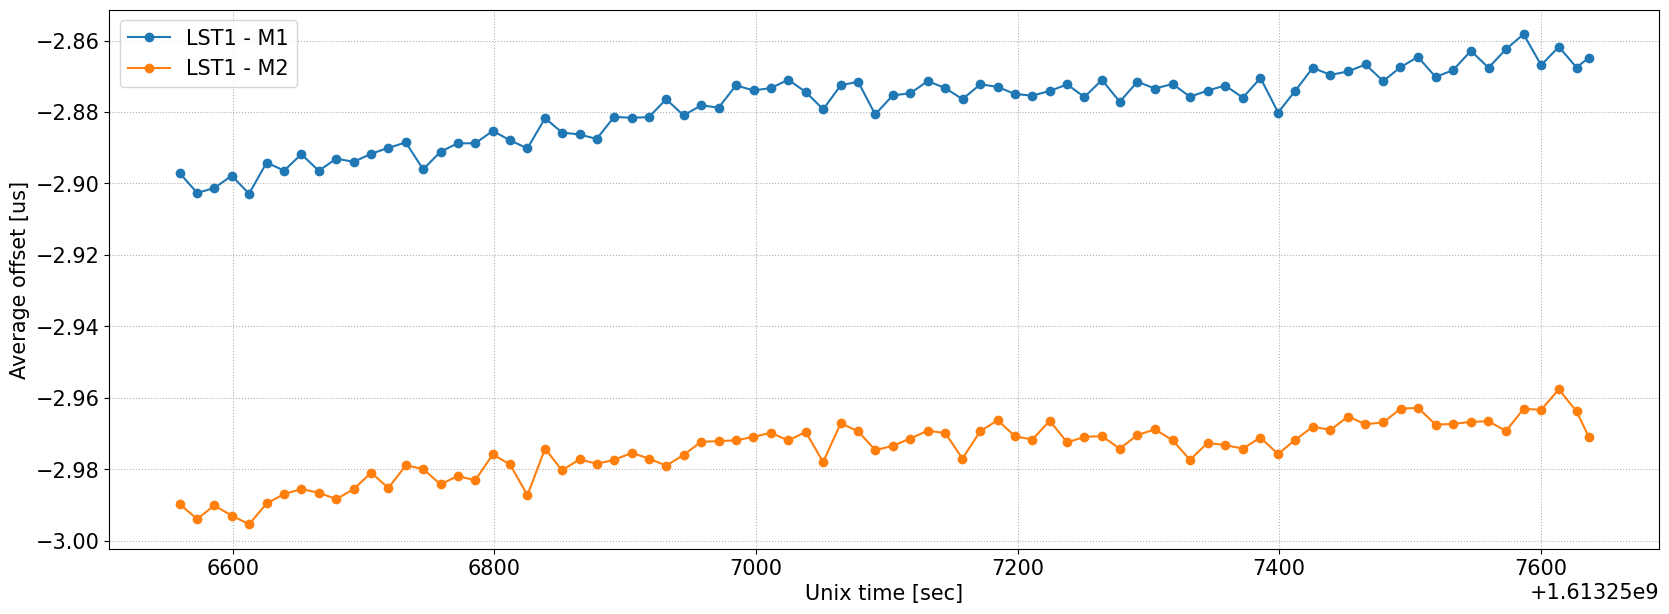

In [24]:
plt.figure(figsize=(20, 7))
plt.xlabel("Unix time [sec]")
plt.ylabel("Average offset [us]")
plt.grid()

# Loop over every coincidence ID
for tel_combo in tel_combos:
    
    combo_name=tel_combos[tel_combo]

    df_features = features.query(f"coincidence_id == {tel_combo}")

    # Plot the average offset
    plt.plot(
        df_features["unix_time"],
        df_features["average_offset"],
        marker="o",
        label=combo_name,
    )

plt.legend()

# 5.2) Check the number of coincident events

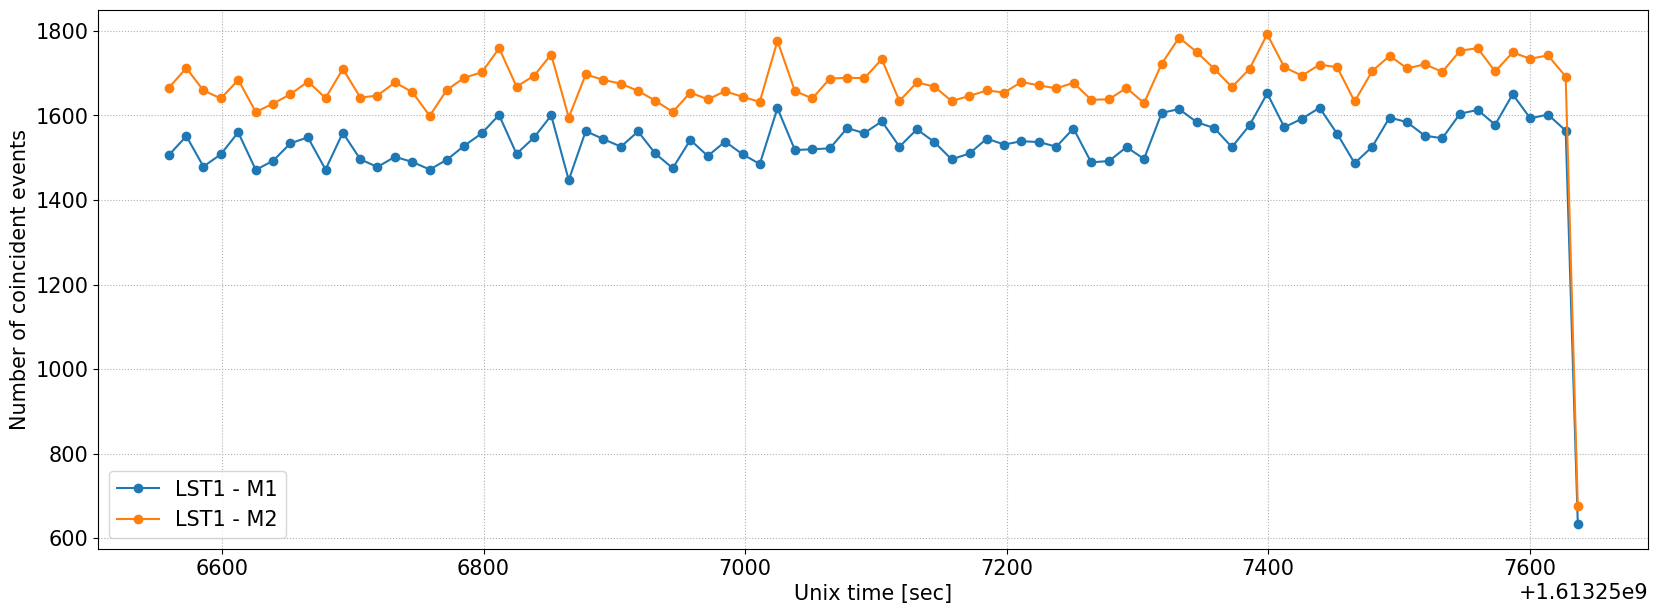

In [25]:
plt.figure(figsize=(20, 7))
plt.xlabel("Unix time [sec]")
plt.ylabel("Number of coincident events")
plt.grid()

# Loop over every coincidence ID
for tel_combo in tel_combos:
    
    combo_name=tel_combos[tel_combo]

    df_features = features.query(f"coincidence_id == {tel_combo}")

    # Plot the number of coincident events
    plt.plot(
        df_features["unix_time"],
        df_features["n_coincidence"],
        marker="o",
        label=combo_name,
    )

plt.legend()

# 5.3) Check the fraction of coincidence

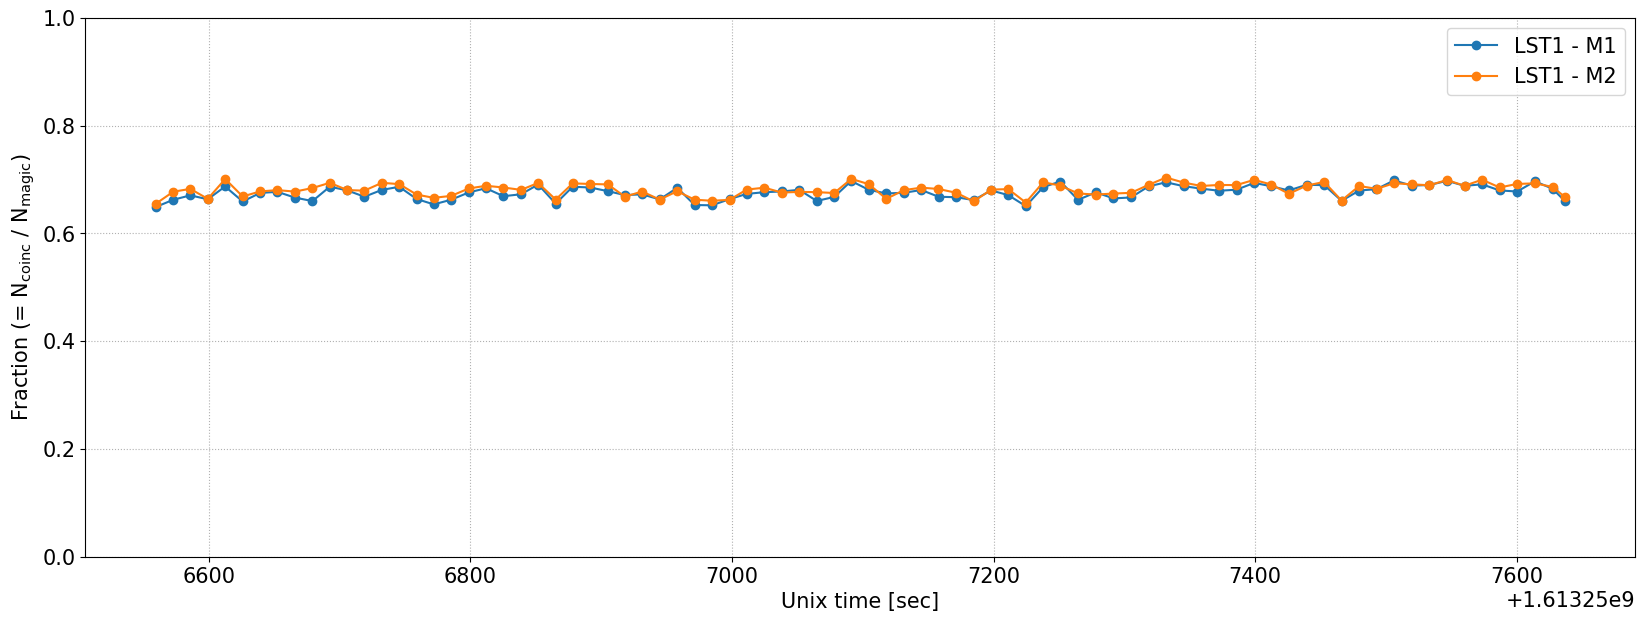

In [26]:
plt.figure(figsize=(20, 7))
plt.xlabel("Unix time [sec]")
plt.ylabel("Fraction (= N$_\mathrm{coinc}$ / N$_\mathrm{magic}$)")
plt.ylim(0, 1)
plt.grid()

# Loop over every coincidence ID
for tel_combo in tel_combos:
    
    combo_name=tel_combos[tel_combo]

    df_features = features.query(f"coincidence_id == {tel_combo}")
    fractions = df_features["n_coincidence"] / df_features["n_events_magic"]

    # Plot the fraction of coincidence
    plt.plot(df_features["unix_time"], fractions, marker="o", label=combo_name)

plt.legend()

# 6) Check cocindences in multiple runs

Two main things can be noticed:

    - The drop of coincident events at the end of each run due to the wobble change
    - The change of average time offset and over all numerber of coincidencent events with time, due to the change of source position.

In [27]:
data_list_2runs=[]
for run_number in run_list:
    print(f"Loading the input files for run {run_number}...")
    input_files=glob.glob(f'{output_dir}/*{run_number}*.h5')
    input_files.sort()
    n_files=len(input_files)

    for i_file, input_file in enumerate(input_files):

        if i_file % 10 == 0:
            print(f"{i_file}/{n_files}")

        # Load the coincidence features
        df = pd.read_hdf(input_file, key="coincidence/feature")
        df['run_number']=run_number
        data_list_2runs.append(df)
    
    print(f"{n_files}/{n_files}")

# Combine the data frames
features_2runs = pd.concat(data_list_2runs)
features_2runs=features_2runs.set_index('run_number')
# Show the data frame
features_2runs.head()

Loading the input files for run 3631...
0/66
10/66
20/66
30/66
40/66
50/66
60/66
66/66
Loading the input files for run 3632...
0/90
10/90
20/90
30/90
40/90
50/90
60/90
70/90
80/90
90/90
Loading the input files for run 3633...
0/45
10/45
20/45
30/45
40/45
45/45
Loading the input files for run 3634...
0/82
10/82
20/82
30/82
40/82
50/82
60/82
70/82
80/82
82/82
Loading the input files for run 3635...
0/74
10/74
20/74
30/74
40/74
50/74
60/74
70/74
74/74


,coincidence_id,window_half_width,unix_time,pointing_alt_lst,pointing_az_lst,pointing_alt_magic,pointing_az_magic,average_offset,n_coincidence,n_events_magic
run_number,,,,,,,,,,
3631,12,300,1.613253e+09,1.356320,4.154563,1.356300,4.154652,-3.016105,838,1330
3631,13,300,1.613253e+09,1.356321,4.154561,1.356187,4.154629,-3.089862,917,1417
3631,12,300,1.613253e+09,1.355908,4.156000,1.355891,4.156061,-3.021048,811,1298
3631,13,300,1.613253e+09,1.355906,4.156008,1.355747,4.156084,-3.084522,893,1367
3631,12,300,1.613253e+09,1.355453,4.157596,1.355458,4.157576,-3.019395,887,1381


/tmp/ipykernel_10742/3753596108.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot2grid(grid, (i_grid,0))


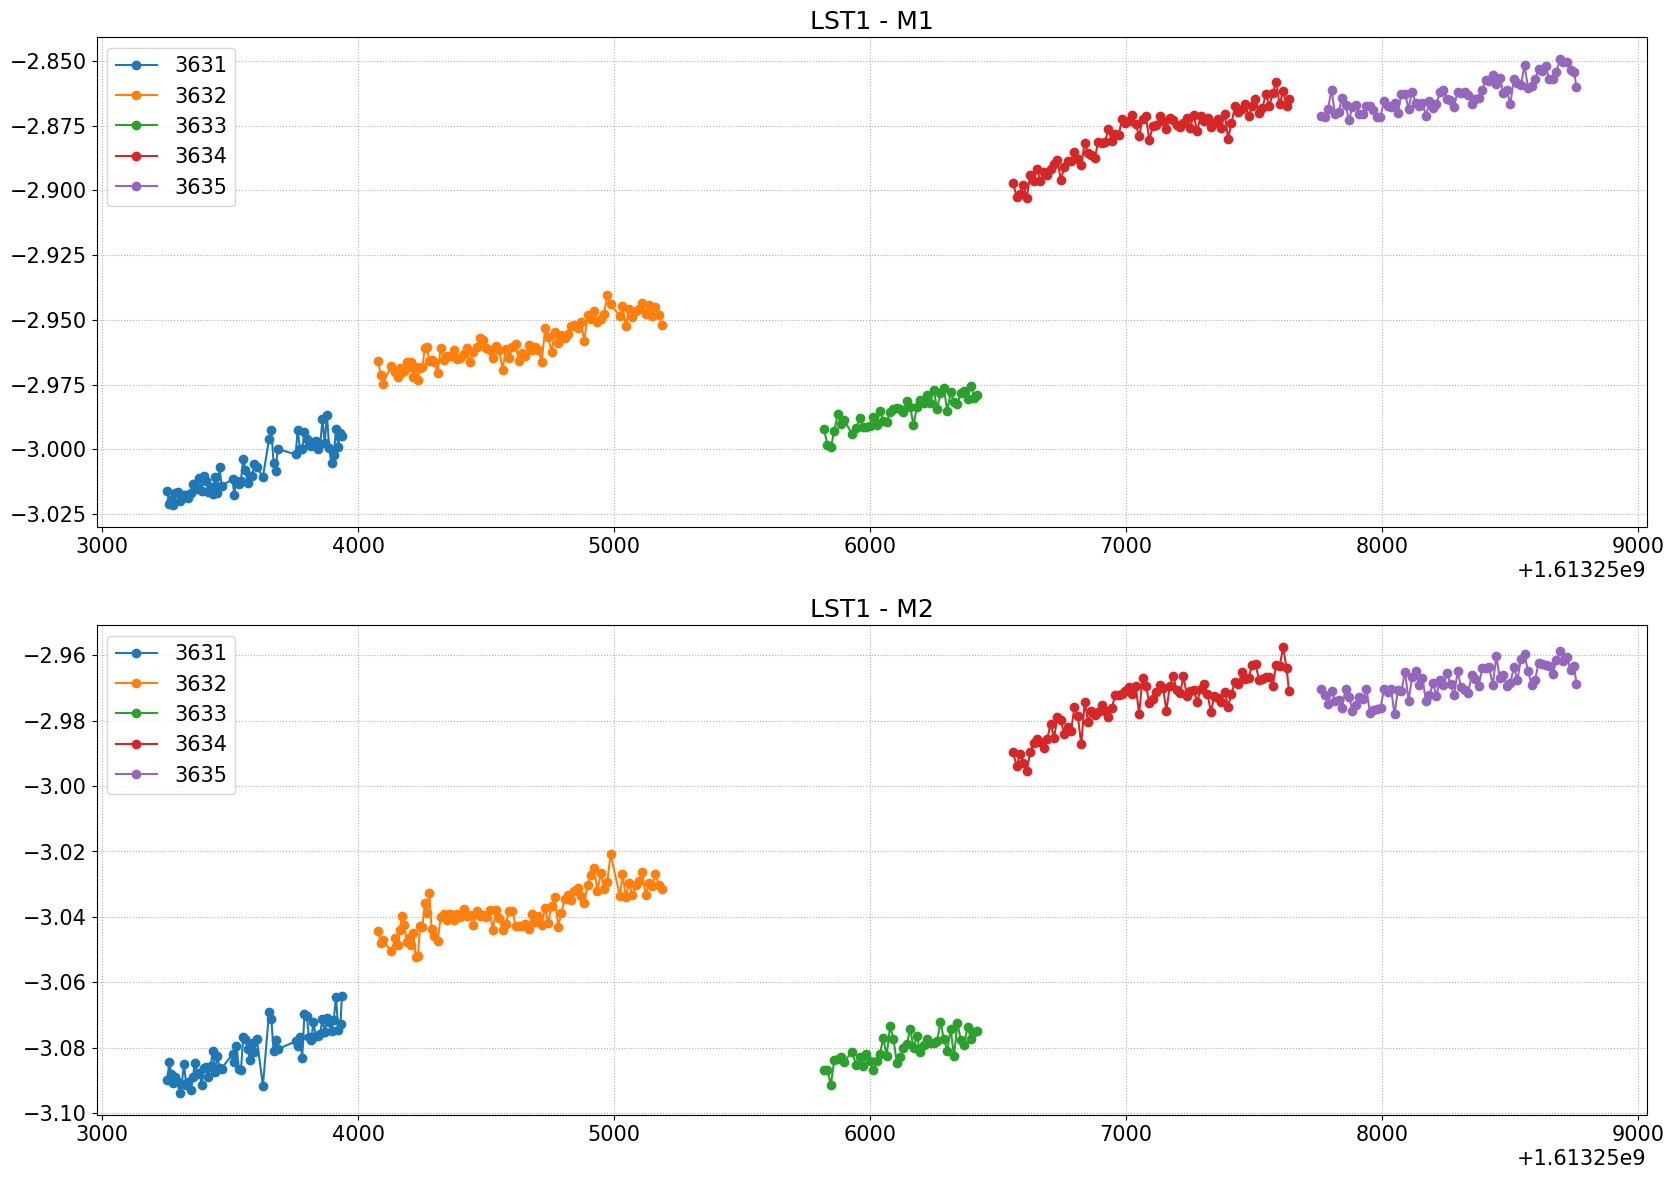

In [30]:
plt.figure(figsize=(20, 14))
plt.xlabel("Unix time [sec]")
plt.ylabel("Average offset [us]")
grid = (2, 1)

for i_grid,tel_combo in enumerate(tel_combos):
    ax = plt.gca()
    combo_name=tel_combos[tel_combo]
    plt.subplot2grid(grid, (i_grid,0))
    
    
    plt.title(f'{combo_name}')
    for run_number in run_list:
        color = next(ax._get_lines.prop_cycler)['color']
        features_run=features_2runs.iloc[features_2runs.index.get_level_values('run_number') == run_number]
        df_features = features_run.query(f"coincidence_id == {tel_combo}")
        
        plt.plot(
            df_features["unix_time"],
            df_features["average_offset"],
            marker="o",
            label=run_number,
        )
    plt.grid()
    plt.legend()

/tmp/ipykernel_10742/3785143227.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot2grid(grid, (i_grid,0))


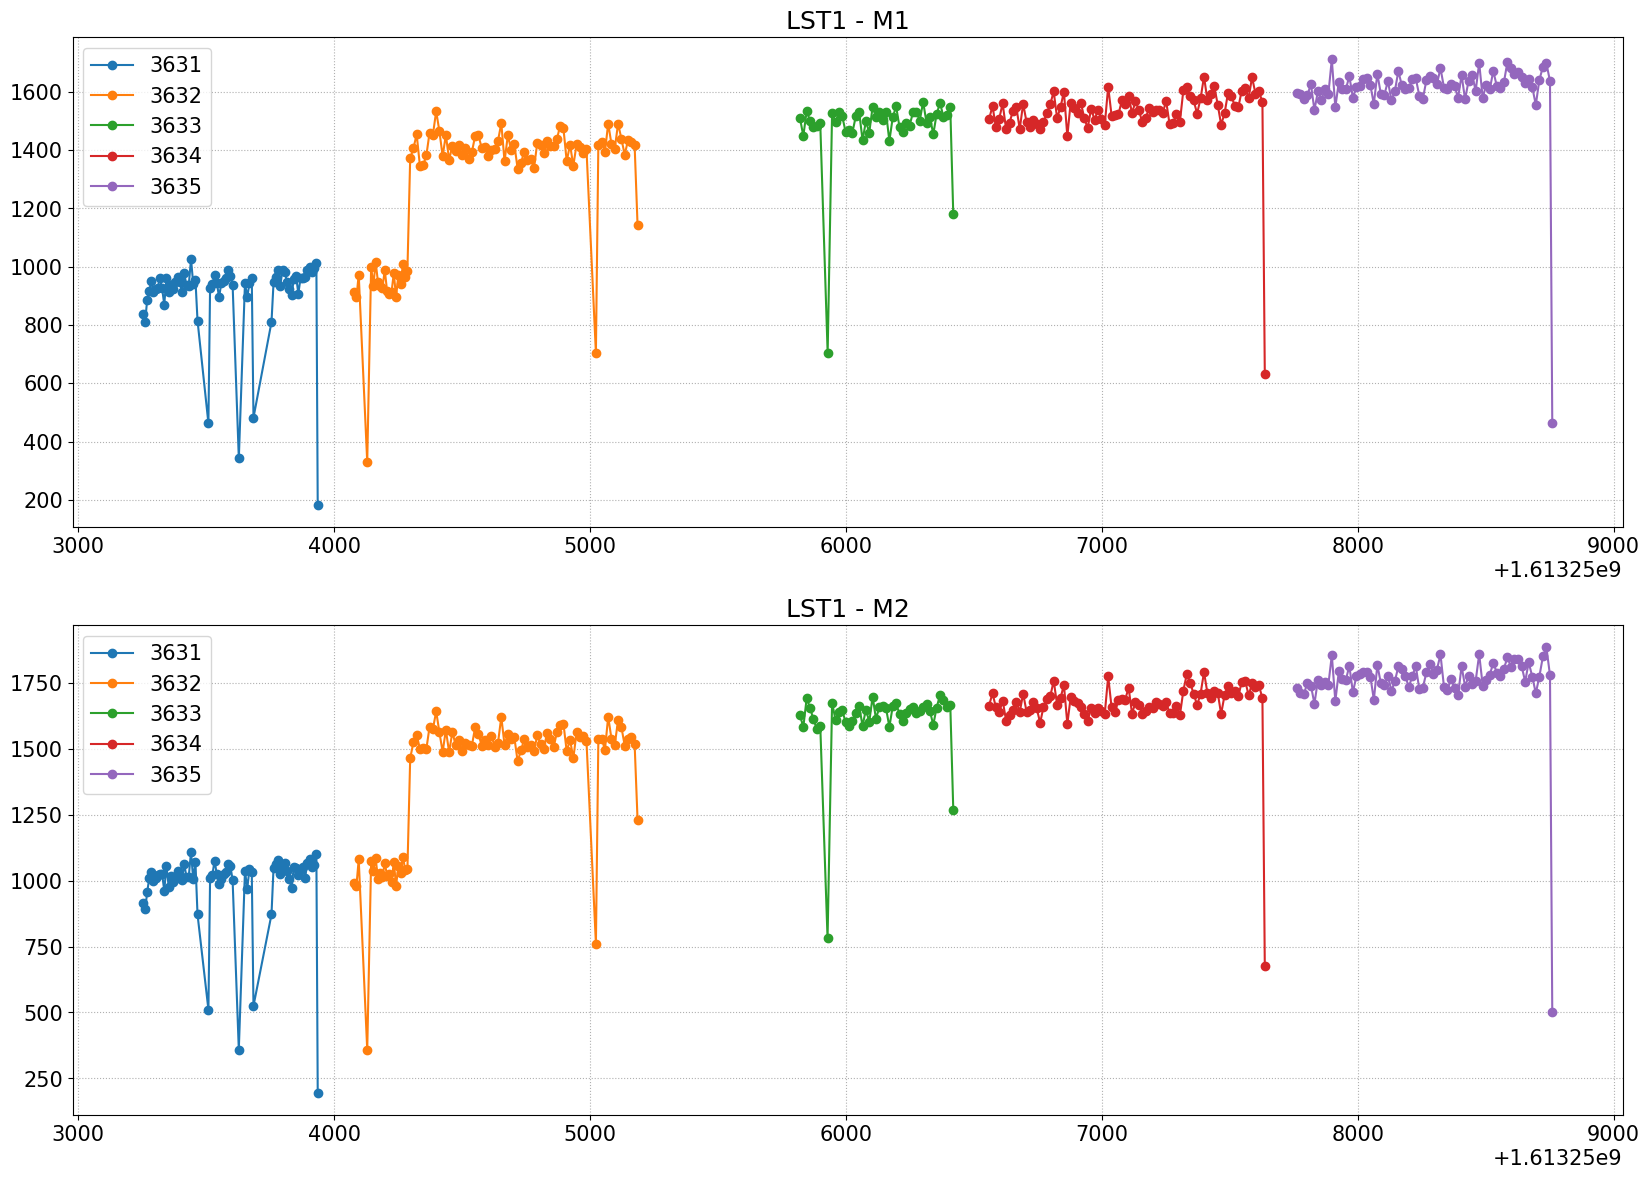

In [31]:
plt.figure(figsize=(20, 14))

plt.xlabel("Unix time [sec]")
plt.ylabel("Number of coincident events")

# Loop over every coincidence ID
grid = (2, 1)

for i_grid,tel_combo in enumerate(tel_combos):
    ax = plt.gca()
    combo_name=tel_combos[tel_combo]
    plt.subplot2grid(grid, (i_grid,0))
    
    
    plt.title(f'{combo_name}')
    for run_number in run_list:
        color = next(ax._get_lines.prop_cycler)['color']
        features_run=features_2runs.iloc[features_2runs.index.get_level_values('run_number') == run_number]
        df_features = features_run.query(f"coincidence_id == {tel_combo}")
        
        # Plot the number of coincident events
        plt.plot(
            df_features["unix_time"],
            df_features["n_coincidence"],
            marker="o",
            label=run_number,
            color=color
        )
    plt.grid()
    plt.legend()

/tmp/ipykernel_10742/1437586586.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot2grid(grid, (i_grid,0))


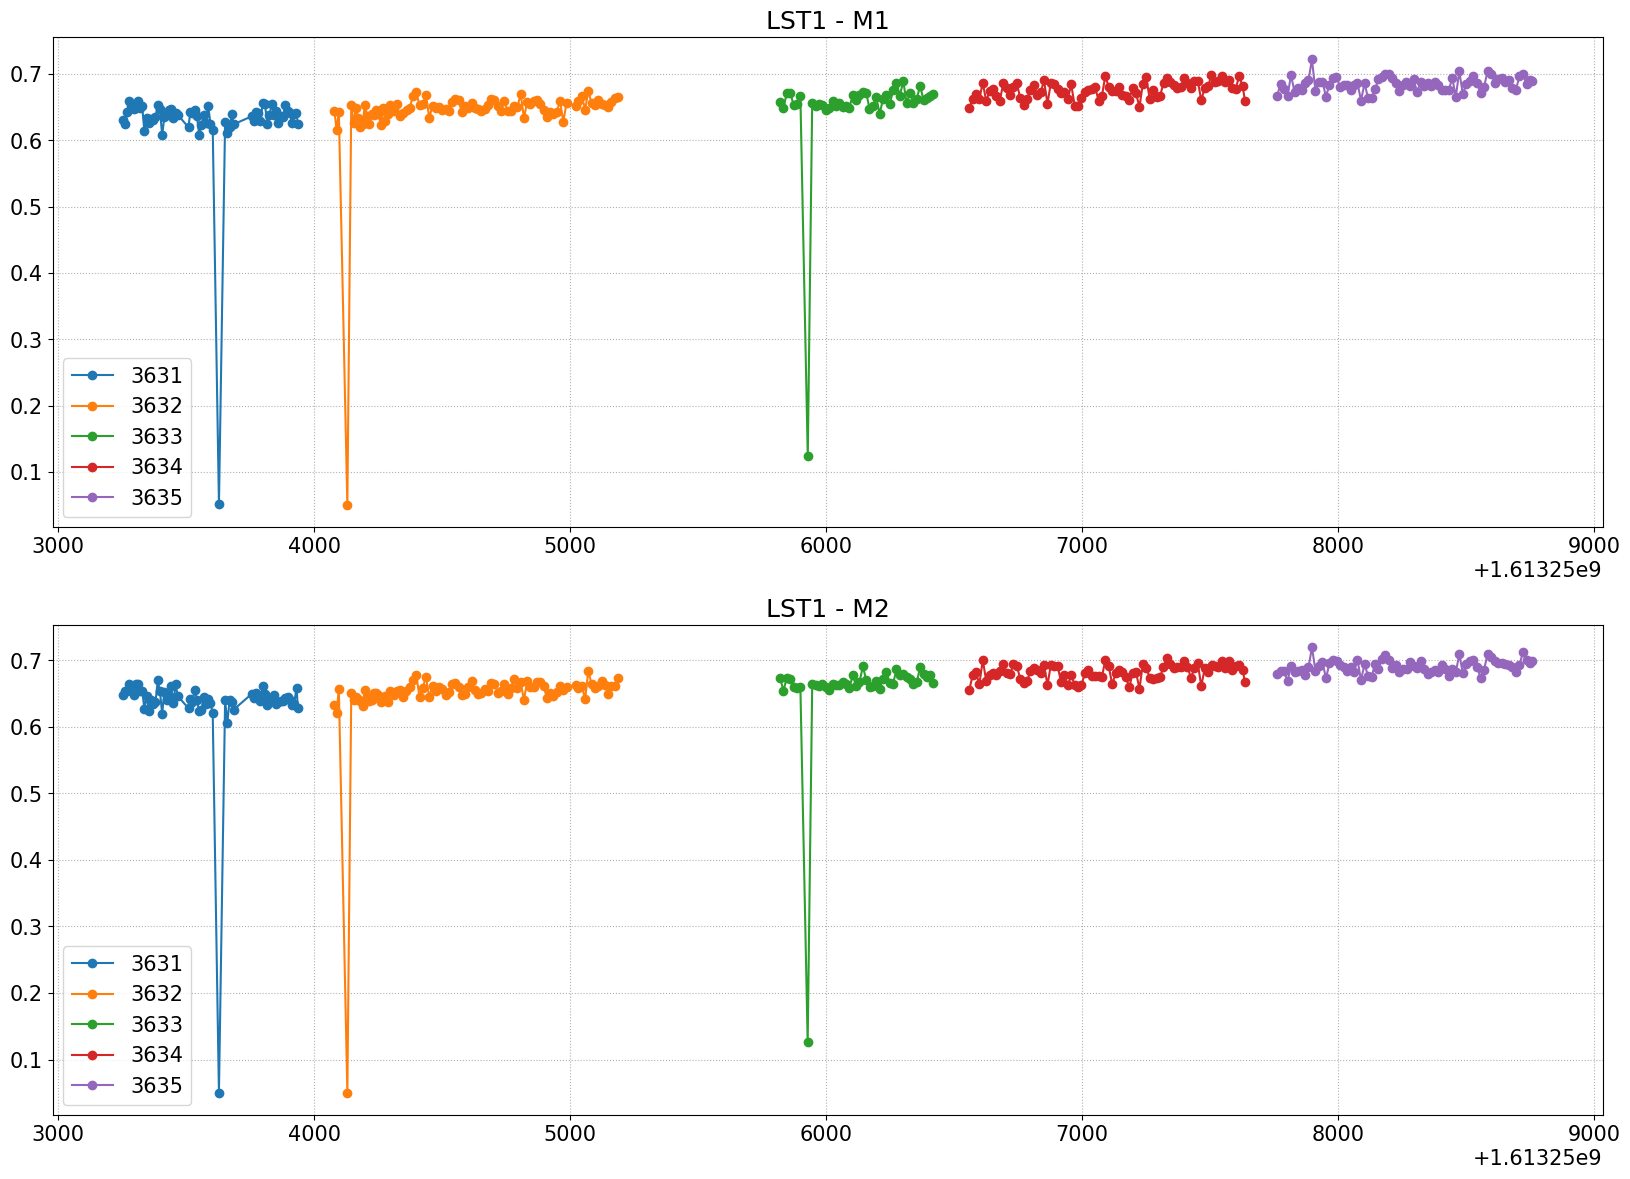

In [32]:
plt.figure(figsize=(20, 14))

plt.xlabel("Unix time [sec]")
plt.ylabel("Number of coincident events")

# Loop over every coincidence ID
grid = (2, 1)

for i_grid,tel_combo in enumerate(tel_combos):
    ax = plt.gca()
    combo_name=tel_combos[tel_combo]
    plt.subplot2grid(grid, (i_grid,0))
    
    
    plt.title(f'{combo_name}')
    for run_number in run_list:
        color = next(ax._get_lines.prop_cycler)['color']
        features_run=features_2runs.iloc[features_2runs.index.get_level_values('run_number') == run_number]
        df_features = features_run.query(f"coincidence_id == {tel_combo}")
        
        fractions = df_features["n_coincidence"] / df_features["n_events_magic"]

    # Plot the fraction of coincidence
        plt.plot(df_features["unix_time"], fractions, marker="o", label=run_number)
    
    plt.grid()
    plt.legend()